# Discrete Sine 2D Fourier Solver

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.fftpack import dst

In [8]:
def dst2(x, axes=(-1, -2)):
    return dst(dst(x, axis=axes[0]), axis=axes[1])

def idst2(x, axes=(-1,-2)):
    """
    the same as dst2 because of some sort of symmetry
    """
    return dst(dst(x, axis=axes[0]), axis=axes[1])

In [11]:
def fft_poisson(f, h):
    m, n = f.shape
    f_bar = np.zeros([n, n])
    u_bar = np.zeros_like(f_bar)
    u = np.zeros_like(u_bar)
    
    f_bar = idst2(f)
    f_bar = f_bar * (2/n+1)**2 #normalize: WHY????
    lam = np.arange(1, n+1)                                           #k vector
    lam = -4/h**2 * (np.sin((lam*np.pi) / (2*(n+1))))**2
    for i in range(0, n):
        for j in range(0, n):
            u_bar[i, j] = f_bar[i,j] / (lam[i] + lam[j])
    u = dst2(u_bar)
    u = u * (2/(n+1))**2            #renormalization
    return u

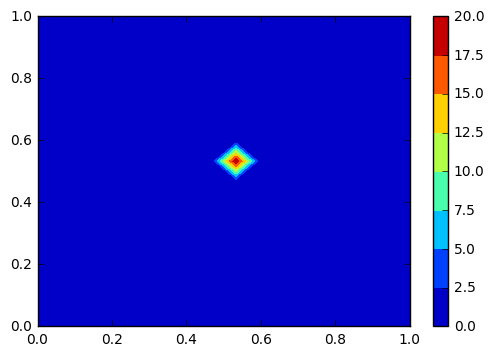

In [62]:
a = 0
b = 1
alpha = 4
n = 2**alpha

L = b-a
x = y = np.linspace(a, b, n)
X, Y = np.meshgrid(x, y)

h = L/n
h2 = h**2
hx2 = h2
hy2 = h2
f = np.zeros([n,n])
f[int((n+1)/2), int((n+1)/2)] = 20
np.random.seed(1)
# xi, yi = np.random.randint(0, n, size=2)
# f[xi, yi] = -10
plt.contourf(X, Y, f)
plt.colorbar()

In [63]:
U = np.zeros([n, n])
U[0,:] = 0
U[-1,:] = 0
U[:,0] = 0
U[:, -1] = 0

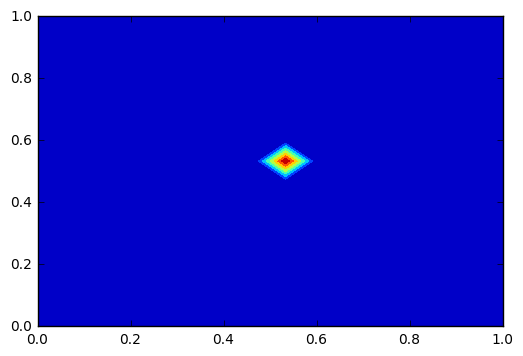

In [64]:
f[1,:] = f[1,:] + U[0, :]/hx2
f[-1, :] = f[-1,:] + U[-1, :]/hx2

f[:, 1] = f[:,1] + U[:, 0]/hy2
f[:, -1] = f[:, -1] + U[:, -1]/hy2

plt.contourf(X,Y,f)

In [65]:
U = fft_poisson(f, h)

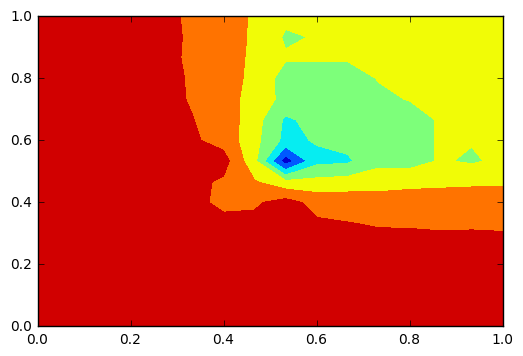

In [66]:
plt.contourf(X,Y,U)

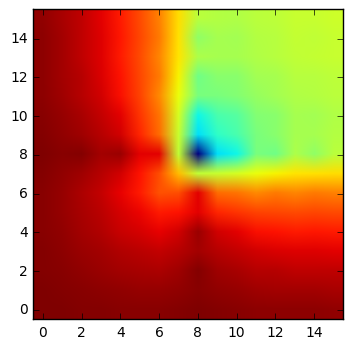

In [67]:
plt.imshow(U, origin='lower')